#cleaning data in python

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load and inspect the data

In [2]:
#load file
audible=pd.read_csv('/content/audible_uncleaned.csv')

#view the first rows of the dataframe
audible

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
45177,Helles Land,Writtenby:MaryE.Garner,Narratedby:AnnVielhaben,13 hrs and 24 mins,23-12-21,german,Not rated yet,"1,005.00"
45178,Der Ewige Wächter,Writtenby:CliffAllister,Narratedby:MatthiasLühn,7 hrs and 27 mins,22-12-21,german,Not rated yet,602.00
45179,Watch Dogs Legion: Day Zero,"Writtenby:JamesSwallow,JoshReynolds",Narratedby:SamKusi,10 hrs and 17 mins,17-12-21,English,Not rated yet,586.00
45180,Et nu i vinden,"Writtenby:AndréBrink,ClaraSelborn",Narratedby:GerdaGilboe,12 hrs and 8 mins,10-12-21,danish,Not rated yet,300.00


In [3]:
#inspect the columns'data types'
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45182 entries, 0 to 45181
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         45182 non-null  object
 1   author       45181 non-null  object
 2   narrator     45181 non-null  object
 3   time         45181 non-null  object
 4   releasedate  45181 non-null  object
 5   language     45181 non-null  object
 6   stars        45181 non-null  object
 7   price        45181 non-null  object
dtypes: object(8)
memory usage: 2.8+ MB


cleaning the text columns like author and narrator

In [4]:
#remove wriitenby:from the author column
audible['author']=audible['author'].str.replace('Writtenby:','')

#remove writtenby:from the narrator column
audible['narrator']=audible['narrator'].str.replace('Writtenby:','')

#check the results
audible

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
45177,Helles Land,MaryE.Garner,Narratedby:AnnVielhaben,13 hrs and 24 mins,23-12-21,german,Not rated yet,"1,005.00"
45178,Der Ewige Wächter,CliffAllister,Narratedby:MatthiasLühn,7 hrs and 27 mins,22-12-21,german,Not rated yet,602.00
45179,Watch Dogs Legion: Day Zero,"JamesSwallow,JoshReynolds",Narratedby:SamKusi,10 hrs and 17 mins,17-12-21,English,Not rated yet,586.00
45180,Et nu i vinden,"AndréBrink,ClaraSelborn",Narratedby:GerdaGilboe,12 hrs and 8 mins,10-12-21,danish,Not rated yet,300.00


#Extract number of stars and ratings from stars column

In [5]:
#get a glimpse of the stars column
audible.stars.sample(n=10)


31510                Not rated yet
15714                Not rated yet
6072                 Not rated yet
3916                 Not rated yet
40337    5 out of 5 stars2 ratings
23645                Not rated yet
35586                Not rated yet
18797                Not rated yet
7975                 Not rated yet
44937                Not rated yet
Name: stars, dtype: object

In [6]:
#explore the values of the star column that are not yet rated
audible[audible.stars!='Not rated yet'].stars.sample(n=10)

23090      5 out of 5 stars7 ratings
26520       5 out of 5 stars1 rating
19690    4.5 out of 5 stars2 ratings
23721      5 out of 5 stars3 ratings
38198      5 out of 5 stars2 ratings
10656       5 out of 5 stars1 rating
9283        5 out of 5 stars1 rating
27717    4.5 out of 5 stars2 ratings
43079      5 out of 5 stars2 ratings
35657      5 out of 5 stars2 ratings
Name: stars, dtype: object

In [7]:
#replacwe not rated with NaN
audible.stars.replace('Not rated yet',np.nan,inplace=True)

In [8]:
#extract number of stars into rating_stars and turn into float
audible['rating_stars'] = audible['stars'].str.extract('^([\d.]+)').astype(float)

#replace the comma,extract number of ratings into n_ratings and turn into float
audible['n_ratings']=audible['stars'].str.replace(',','').str.extract('(\d+) rating').astype(float)

#examine the new rating_stars and n_ratings columns
audible[['rating_stars','n_ratings']]

,rating_stars,n_ratings
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0
...,...,...
45177,NaN,NaN
45178,NaN,NaN
45179,NaN,NaN
45180,NaN,NaN


In [9]:
#drop the stars column
audible.drop('stars',axis=1,inplace=True)

#check results
audible

,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,5.0,34.0
1,The Burning Maze,RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,4.5,41.0
2,The Deep End,JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,4.5,38.0
3,Daughter of the Deep,RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,820.00,4.5,181.0
...,...,...,...,...,...,...,...,...,...
45177,Helles Land,MaryE.Garner,Narratedby:AnnVielhaben,13 hrs and 24 mins,23-12-21,german,"1,005.00",NaN,NaN
45178,Der Ewige Wächter,CliffAllister,Narratedby:MatthiasLühn,7 hrs and 27 mins,22-12-21,german,602.00,NaN,NaN
45179,Watch Dogs Legion: Day Zero,"JamesSwallow,JoshReynolds",Narratedby:SamKusi,10 hrs and 17 mins,17-12-21,English,586.00,NaN,NaN
45180,Et nu i vinden,"AndréBrink,ClaraSelborn",Narratedby:GerdaGilboe,12 hrs and 8 mins,10-12-21,danish,300.00,NaN,NaN


#Change data types

In [10]:
#explore the price column
audible.price.sample(n=10)

42589      668.00
19360      200.00
42437      117.00
5462       351.00
43226      586.00
12438      233.00
36987      837.00
9936     1,003.00
42460      702.00
44474      323.00
Name: price, dtype: object

In [12]:
#replace the comma with ''
audible['price']=audible['price'].str.replace(',','')

#replace free with 0
audible['price']=audible['price'].str.replace('Free','0')

#turn into float
audible['price']=audible['price'].astype(float)


In [13]:
#look aat the unique values in the rating_stars column
audible.rating_stars.unique()

array([5. , 4.5, 4. , nan, 3.5, 3. , 1. , 2. , 2.5, 1.5])

In [14]:
#turn rating_stars to category
audible['rating_stars']=audible['rating_stars'].astype('category')

#check results
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45182 entries, 0 to 45181
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          45182 non-null  object  
 1   author        45181 non-null  object  
 2   narrator      45181 non-null  object  
 3   time          45181 non-null  object  
 4   releasedate   45181 non-null  object  
 5   language      45181 non-null  object  
 6   price         45181 non-null  float64 
 7   rating_stars  7752 non-null   category
 8   n_ratings     7752 non-null   float64 
dtypes: category(1), float64(2), object(6)
memory usage: 2.8+ MB


In [17]:
#convert release date to datetime
audible['releasedate']=pd.to_datetime(audible['releasedate'])

#check results
audible.info()

<ipython-input-17-4f65f8c6ca21>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  audible['releasedate']=pd.to_datetime(audible['releasedate'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45182 entries, 0 to 45181
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          45182 non-null  object        
 1   author        45181 non-null  object        
 2   narrator      45181 non-null  object        
 3   time          45181 non-null  object        
 4   releasedate   45181 non-null  datetime64[ns]
 5   language      45181 non-null  object        
 6   price         45181 non-null  float64       
 7   rating_stars  7752 non-null   category      
 8   n_ratings     7752 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 2.8+ MB


In [18]:
#explore the values in the time column
audible.time.sample(n=10)

34459              36 mins
28792    9 hrs and 45 mins
43930     9 hrs and 6 mins
44378    6 hrs and 30 mins
7092               49 mins
29448                3 hrs
10220               4 mins
39617    11 hrs and 3 mins
42437              25 mins
2211                7 mins
Name: time, dtype: object

In [20]:
#replace hrs,mins, and 'Less than 1 minute'
audible['time']=audible['time'].str.replace('hrs','')
audible['time']=audible['time'].str.replace('mins','')
audible['time']=audible['time'].str.replace('Less than 1 minute','0')



#check results
audible[['time']]


,time
0,2 and 20
1,13 and 8
2,2 and 3
3,11 and 16
4,10
...,...
45177,13 and 24
45178,7 and 27
45179,10 and 17
45180,12 and 8


In [21]:
#extract the number of hours,turn to integer
audible['hours']=audible['time'].str.extract('(\d+) hr').fillna(0).astype(int)

#extract the number of minutes,turn to integer
audible['minutes']=audible['time'].str.extract('(\d+) min').fillna(0).astype(int)

#combine hours and minutes into time_mins column
audible['time_mins']=audible['hours']*60+audible['minutes']

#check results
audible[['time_mins']]


,time_mins
0,0
1,0
2,0
3,0
4,0
...,...
45177,0
45178,0
45179,0
45180,0


In [22]:
#drop the time column
audible.drop('time',axis=1,inplace=True)

#check
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45182 entries, 0 to 45181
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          45182 non-null  object        
 1   author        45181 non-null  object        
 2   narrator      45181 non-null  object        
 3   releasedate   45181 non-null  datetime64[ns]
 4   language      45181 non-null  object        
 5   price         45181 non-null  float64       
 6   rating_stars  7752 non-null   category      
 7   n_ratings     7752 non-null   float64       
 8   hours         45182 non-null  int64         
 9   minutes       45182 non-null  int64         
 10  time_mins     45182 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 3.5+ MB


#Check data ranges

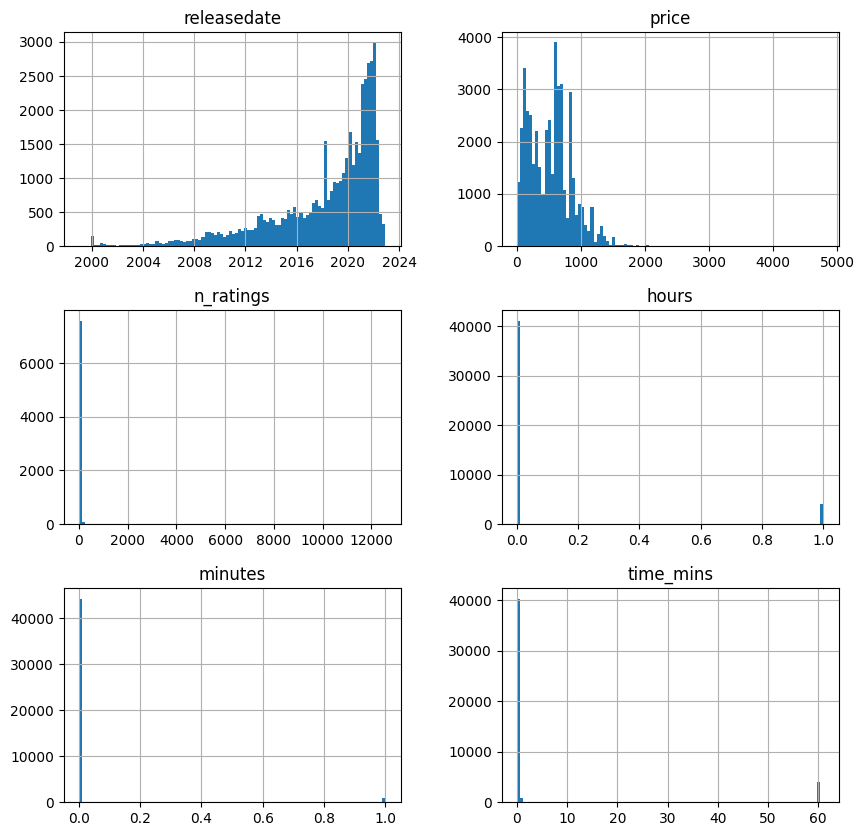

In [24]:
#plot histograms of all the numerical columns
audible.hist(figsize=(10,10),bins=100)
plt.show()


In [25]:
#checking a summary of the numeric columns
audible.describe()

,releasedate,price,n_ratings,hours,minutes,time_mins
count,45181,45181.000000,7752.000000,45182.000000,45182.000000,45182.000000
mean,2018-03-26 10:53:28.056483840,524.836411,19.304180,0.090346,0.020606,5.441348
min,1998-12-27 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2016-03-22 00:00:00,233.000000,1.000000,0.000000,0.000000,0.000000
50%,2019-10-29 00:00:00,501.000000,2.000000,0.000000,0.000000,0.000000
75%,2021-06-07 00:00:00,703.000000,6.000000,0.000000,0.000000,0.000000
max,2022-12-03 00:00:00,4783.000000,12569.000000,1.000000,1.000000,61.000000
std,NaN,331.473735,181.309352,0.286680,0.142061,17.204287


In [26]:
#check the non numeric columns
audible.describe(exclude=[np.number])

,name,author,narrator,releasedate,language,rating_stars
count,45182,45181,45181,45181,45181,7752.0
unique,43602,28301,16928,NaN,35,9.0
top,The Art of War,"矢島雅弘,石橋遊",Narratedby:anonymous,NaN,English,5.0
freq,19,874,1033,NaN,32133,3679.0
mean,NaN,NaN,NaN,2018-03-26 10:53:28.056483840,NaN,NaN
min,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,2016-03-22 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,2019-10-29 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,2021-06-07 00:00:00,NaN,NaN
max,NaN,NaN,NaN,2022-12-03 00:00:00,NaN,NaN


In [28]:
#transform prices to usd(multiply times 0.012)
audible['price_usd']=audible['price']*0.012

#check
audible.price.describe()

count    45181.000000
mean       524.836411
std        331.473735
min          0.000000
25%        233.000000
50%        501.000000
75%        703.000000
max       4783.000000
Name: price, dtype: float64

In [29]:
#inspect the language column before making changes
audible.language.unique()

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', nan], dtype=object)

In [30]:
#update capitalization in the language column
audible['language']=audible.language.str.capitalize()

#check results
audible.language.unique()


array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin_chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       'Telugu', nan], dtype=object)

#Check for duplicates

In [31]:
#look for duplicates rows
audible.duplicated().sum()

22

In [32]:
#drop rows with duplicates
audible.drop_duplicates(inplace=True)

#check
audible.duplicated().sum()

0

In [33]:
#create a list of our subset columns and assisgn to subset_cols
subset_cols=['author','narrator','time_mins','price']

#check for duplicates
audible.duplicated(subset=subset_cols).sum()

8333

In [34]:
#check the duplicated rows keeping the duplicates and order by the name column
audible[audible.duplicated(subset=subset_cols,keep=False)].sort_values('name')

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,hours,minutes,time_mins,price_usd
25968,"""Homoaktion"" mod udlændingestyrelsen",Diverse,Narratedby:NielsVedersø,2021-11-25,Danish,133.0,NaN,NaN,0,0,0,1.596
25913,"""Kuffert-manden"" fra Lyngby",Variousauthors,Narratedby:BjarneMouridsen,2021-03-12,Danish,233.0,NaN,NaN,1,0,60,2.796
12386,"""OJ"" sekä vapautettiin että tuomittiin kaksois...",N.N.,Narratedby:LeoNiemi,2020-01-15,Finnish,233.0,NaN,NaN,0,0,0,2.796
12407,"""Paholaiset veivät rakkaani""",N.N.,Narratedby:TeemuMäkinen,2020-01-15,Finnish,233.0,NaN,NaN,1,0,60,2.796
25970,"""Åh – nej, røveri""",Diverse,Narratedby:BjarneMouridsen,2021-11-25,Danish,133.0,NaN,NaN,0,0,0,1.596
...,...,...,...,...,...,...,...,...,...,...,...,...
2418,魔法のリズム 4 ～スピード感のあるフレーズが加わった4+8+16+休符のバリエーション編～,滝川岳,Narratedby:滝川岳,2021-11-17,Japanese,251.0,NaN,NaN,0,0,0,3.012
2412,魔法のリズム5,滝川岳,Narratedby:滝川岳,2021-12-22,Japanese,251.0,NaN,NaN,0,0,0,3.012
2414,魔法のリズム6,滝川岳,Narratedby:滝川岳,2021-12-22,Japanese,251.0,NaN,NaN,0,0,0,3.012
12520,１巻 ケビン 日本へ行く 日本語教材 日英バイリンガル小説,桐谷美和子,"Narratedby:桐谷美和子,山本史朗",2022-02-15,Japanese,697.0,NaN,NaN,0,0,0,8.364


In [35]:
#drop duplicated rows keeping the last release date
audible.drop_duplicates(subset=subset_cols,keep='last',inplace=True)

#check
audible.duplicated(subset=subset_cols).sum()

0

#Dealing with missing values

In [36]:
#check for null values
audible.isnull().sum()

name                0
author              1
narrator            1
releasedate         1
language            1
price               1
rating_stars    29905
n_ratings       29905
hours               0
minutes             0
time_mins           0
price_usd           1
dtype: int64

In [39]:
#replace null values with 0

# Get a list of categorical columns
categorical_cols = audible.select_dtypes(include='category').columns

# Fill null values in non-categorical columns with 0
audible[audible.columns.difference(categorical_cols)] = audible[audible.columns.difference(categorical_cols)].fillna(0)

# For categorical columns, decide on a suitable fill value (e.g., 'Unknown') and add it to the categories
for col in categorical_cols:
    if 0 not in audible[col].cat.categories:
        audible[col] = audible[col].cat.add_categories([0])
    audible[col] = audible[col].fillna(0)  # Now you can fill with 0

#check
audible.isnull().sum()

name            0
author          0
narrator        0
releasedate     0
language        0
price           0
rating_stars    0
n_ratings       0
hours           0
minutes         0
time_mins       0
price_usd       0
dtype: int64